In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('loan.csv')

Reading the file

In [3]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
data.shape

(39717, 111)

Our data has 39717 rows and 111 columns

In [5]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


# Data cleaning

We can see a lot of nan or null values in the dataset

In [7]:
data.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

Some columns are totally filled with nan values

In [8]:
null_counts = data.isnull().sum()

In [9]:
columns_to_drop = null_counts[null_counts > 20000].index

In [10]:
data = data.drop(columns=columns_to_drop)

In [11]:
data.shape

(39717, 54)

In [12]:
data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [13]:
data = data.drop(columns=['emp_title', 'desc']) #Dropping emp_title and desc columns too

Again There are some missing values will treat them but lets check for unique values

In [14]:
data.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

The columns with unique values = 1 did not plays much role we can drop those

In [15]:
unique_counts = data.nunique()
columns_to_drop = unique_counts[unique_counts == 1].index
print(columns_to_drop)

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')


In [16]:
#Dropping the columns with only one unique value 
data = data.drop(columns=columns_to_drop)

In [17]:
data.shape

(39717, 43)

In [18]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [19]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'url', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [20]:
data.isna().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
url                           0
purpose                       0
title                        11
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
out_prncp                     0
out_prnc

Dropping the null vallues of remaining columns

In [21]:
data.dropna(subset=['emp_length', 'title', 'revol_util', 'last_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'], inplace=True)

In [22]:
data.shape

(37825, 43)

In [23]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'url', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

Now based on the description dropping the columns which may not affect the loan(defaulted or not)

In [24]:
data.drop(['member_id', 'url','delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc','open_acc', 'pub_rec','revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv','total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int','total_rec_late_fee', 'recoveries', 'collection_recovery_fee','last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d'], axis=1, inplace=True)
#one id is enough to describe the customer therefore dropping member_id amd url too

In [25]:
data.shape

(37825, 21)

In [26]:
data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,...,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,...,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,...,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,...,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,...,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0.0


Now lets check the target variable that is loan_status

In [27]:
data["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [28]:
data = data[data["loan_status"] != 'Current']

Loan status with value as 'Current' does not give us the colclusion that the loan will default or not, so I will drop all the rows with value as current.

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36727 entries, 0 to 39680
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    36727 non-null  int64  
 1   loan_amnt             36727 non-null  int64  
 2   funded_amnt           36727 non-null  int64  
 3   funded_amnt_inv       36727 non-null  float64
 4   term                  36727 non-null  object 
 5   int_rate              36727 non-null  object 
 6   installment           36727 non-null  float64
 7   grade                 36727 non-null  object 
 8   sub_grade             36727 non-null  object 
 9   emp_length            36727 non-null  object 
 10  home_ownership        36727 non-null  object 
 11  annual_inc            36727 non-null  float64
 12  verification_status   36727 non-null  object 
 13  issue_d               36727 non-null  object 
 14  loan_status           36727 non-null  object 
 15  purpose               36

In [30]:
data['int_rate'] = data.int_rate.str.strip('%').astype(float) #removing % from interest rate and converting it to float

In [31]:
data['issue_d'] = pd.to_datetime(data.issue_d, format='%b-%y') #converting issue_d to datetime format

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36727 entries, 0 to 39680
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    36727 non-null  int64         
 1   loan_amnt             36727 non-null  int64         
 2   funded_amnt           36727 non-null  int64         
 3   funded_amnt_inv       36727 non-null  float64       
 4   term                  36727 non-null  object        
 5   int_rate              36727 non-null  float64       
 6   installment           36727 non-null  float64       
 7   grade                 36727 non-null  object        
 8   sub_grade             36727 non-null  object        
 9   emp_length            36727 non-null  object        
 10  home_ownership        36727 non-null  object        
 11  annual_inc            36727 non-null  float64       
 12  verification_status   36727 non-null  object        
 13  issue_d              

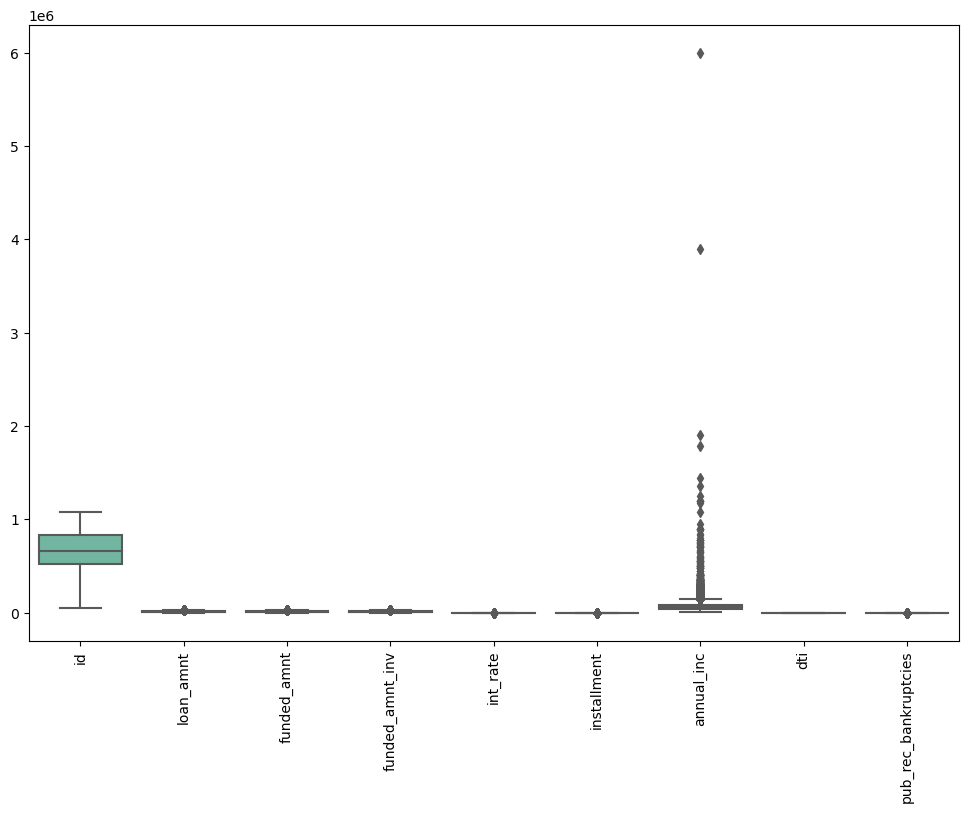

In [33]:
plt.figure(figsize=(12, 8)) 
sns.boxplot(data=data, orient="v", palette="Set2")
plt.xticks(rotation=90)
plt.show()

we can see outliers in annual_inc lets remove them

In [34]:
Q1 = data['annual_inc'].quantile(0.25)
Q3 = data['annual_inc'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

mask = (data['annual_inc'] >= lower_bound) & (data['annual_inc'] <= upper_bound)
data = data[mask]

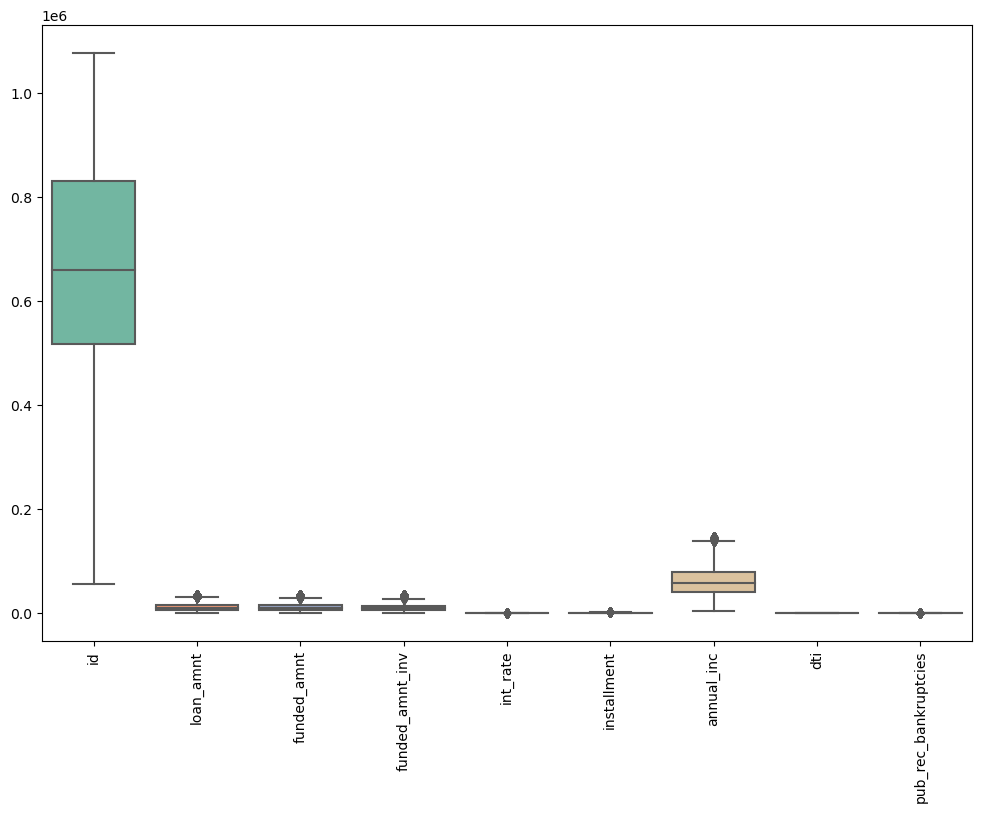

In [35]:
plt.figure(figsize=(12, 8)) 
sns.boxplot(data=data, orient="v", palette="Set2")
plt.xticks(rotation=90)
plt.show()

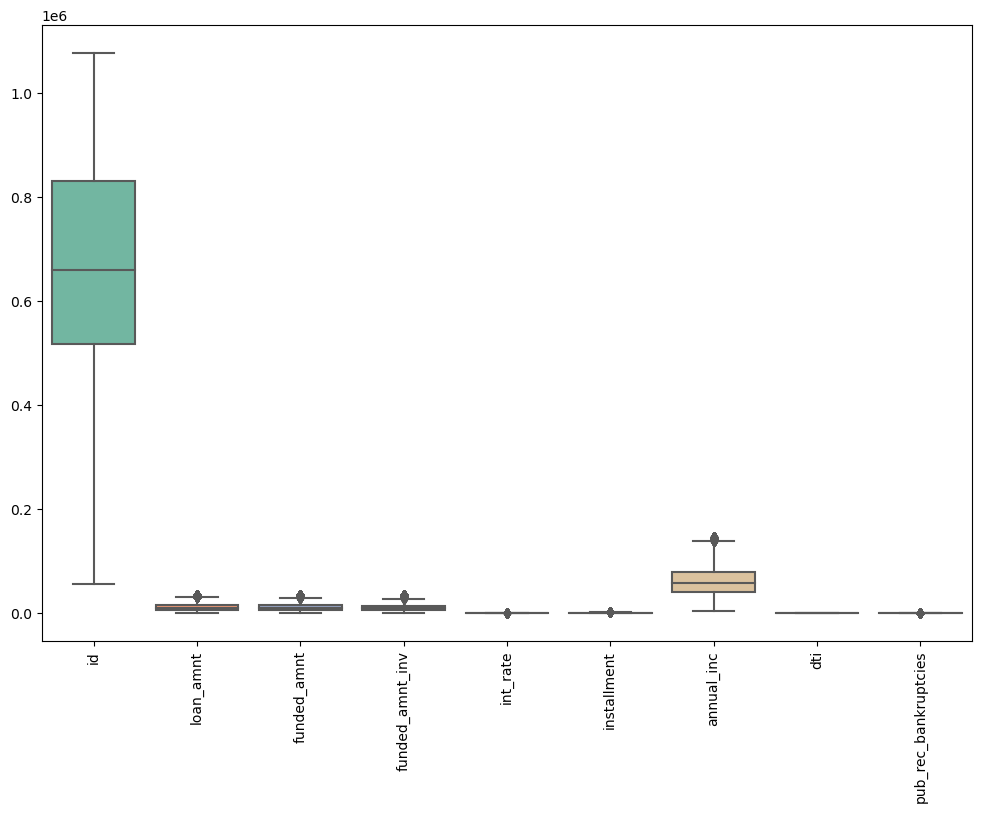

In [36]:
plt.figure(figsize=(12, 8)) 
sns.boxplot(data=data, orient="v", palette="Set2")
plt.xticks(rotation=90)
plt.show()

# Univariate analysis

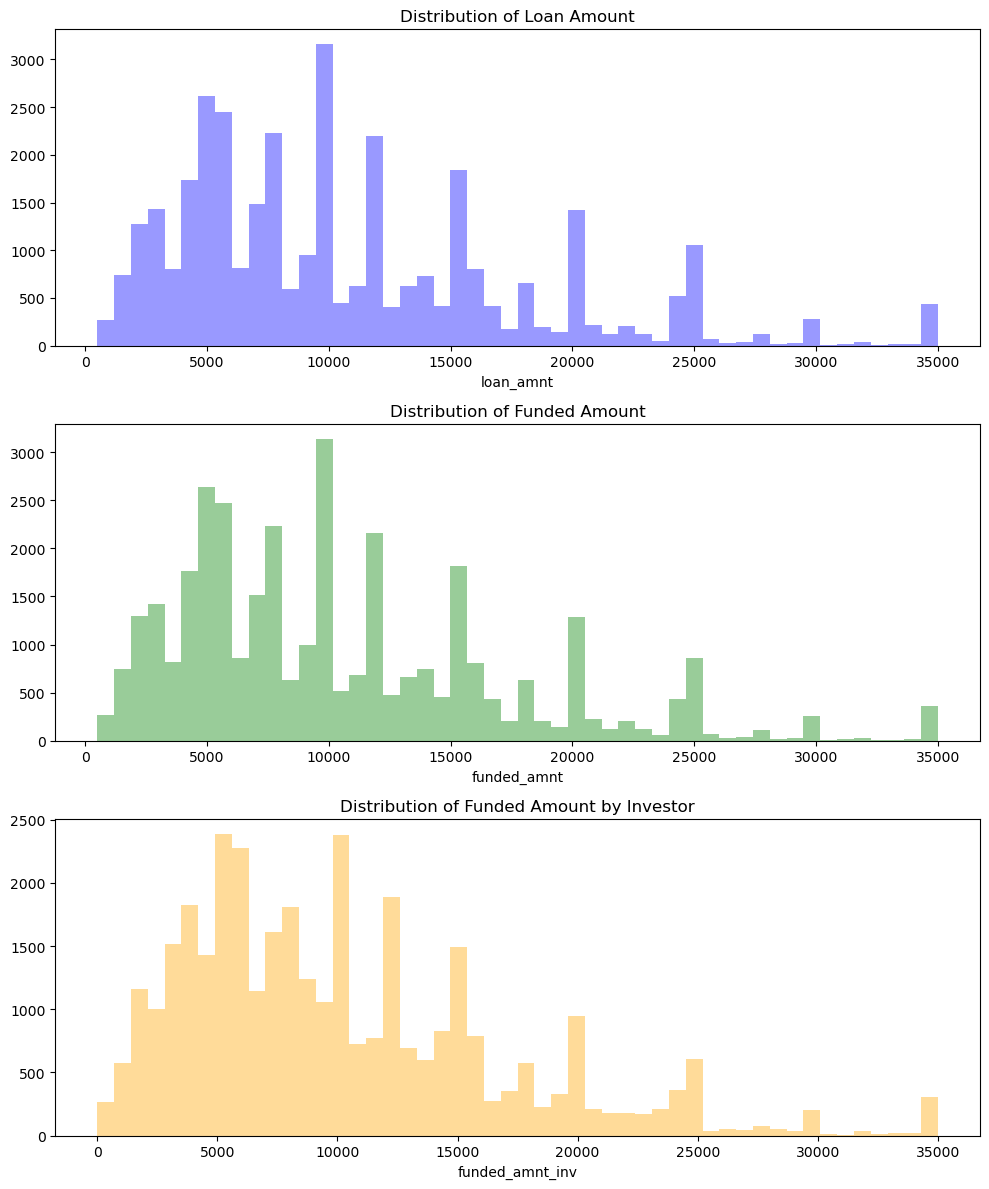

In [37]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))
# Plot the distribution of loan amount
sns.distplot(data['loan_amnt'], ax=axes[0], kde=False, color='blue')
axes[0].set_title('Distribution of Loan Amount')

# Plot the distribution of funded amount
sns.distplot(data['funded_amnt'], ax=axes[1], kde=False, color='green')
axes[1].set_title('Distribution of Funded Amount')

# Plot the distribution of funded amount by investor
sns.distplot(data['funded_amnt_inv'], ax=axes[2], kde=False, color='orange')
axes[2].set_title('Distribution of Funded Amount by Investor')

# Adjust layout
plt.tight_layout()
plt.show()

These distribution looks similar

from loan anount we can see that most of them taken their loan between 5k to 15k 

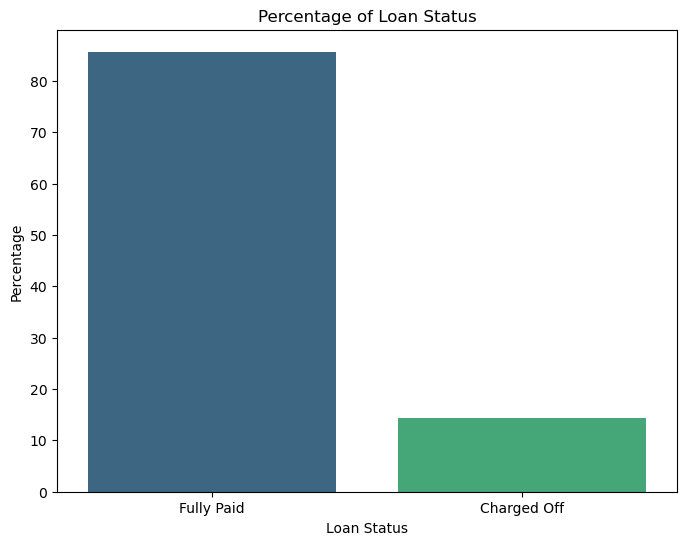

In [38]:
loan_status_counts = data['loan_status'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 6))
sns.barplot(x=loan_status_counts.index, y=loan_status_counts.values, palette='viridis')
plt.title('Percentage of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Percentage')
plt.show()

From here we can see that more than 85 percent of the people have fully paid their loan and about 14 percent have charged off

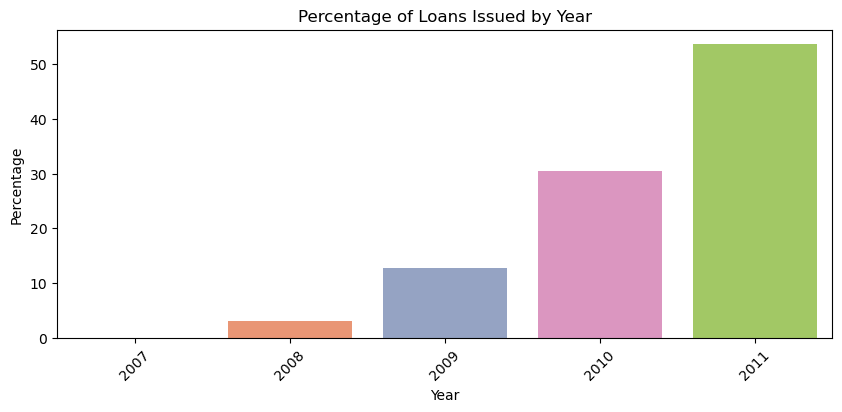

In [39]:
issue_year_counts = pd.to_datetime(data['issue_d']).dt.year.value_counts(normalize=True) * 100
plt.figure(figsize=(10, 4))
sns.barplot(x=issue_year_counts.index, y=issue_year_counts.values, palette='Set2')
plt.title('Percentage of Loans Issued by Year')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.xticks(rotation=45)  
plt.show()

From here we can see that number of loans are increasing year by year and in 2011 most loans are issued.

Now lets check for the purpose of the loan

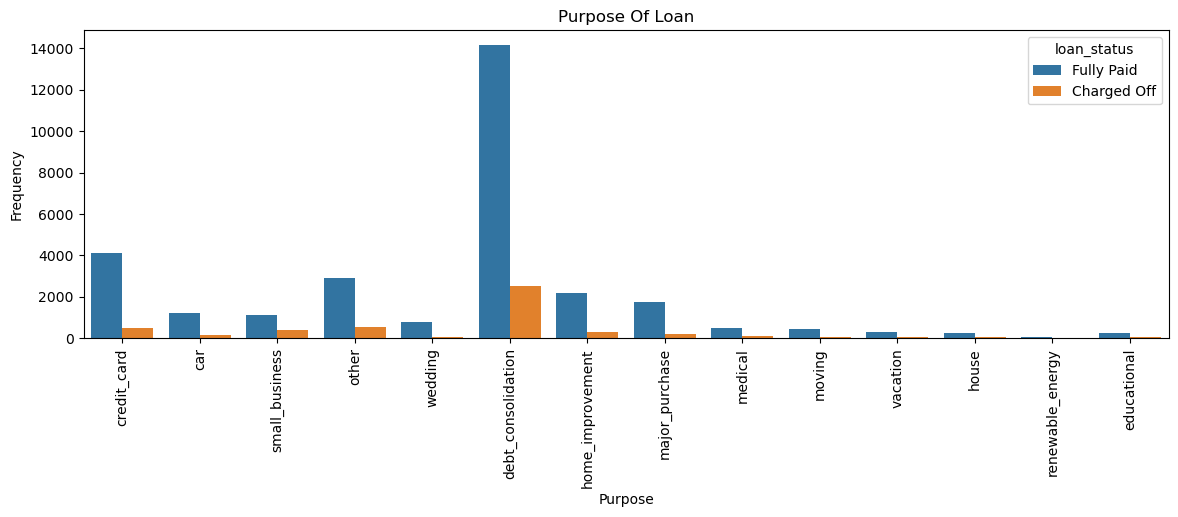

In [40]:
plt.figure(figsize=(14,4))
ax = sns.countplot(x="purpose", data=data, hue= 'loan_status')
ax.set_title('Purpose Of Loan')
ax.set_ylabel('Frequency')
ax.set_xlabel('Purpose')  
plt.xticks(rotation=90)
plt.show()

Most of the people have took loan for debt_consolidation

# Bivariate analysis

Lets analyse loan amount with every column

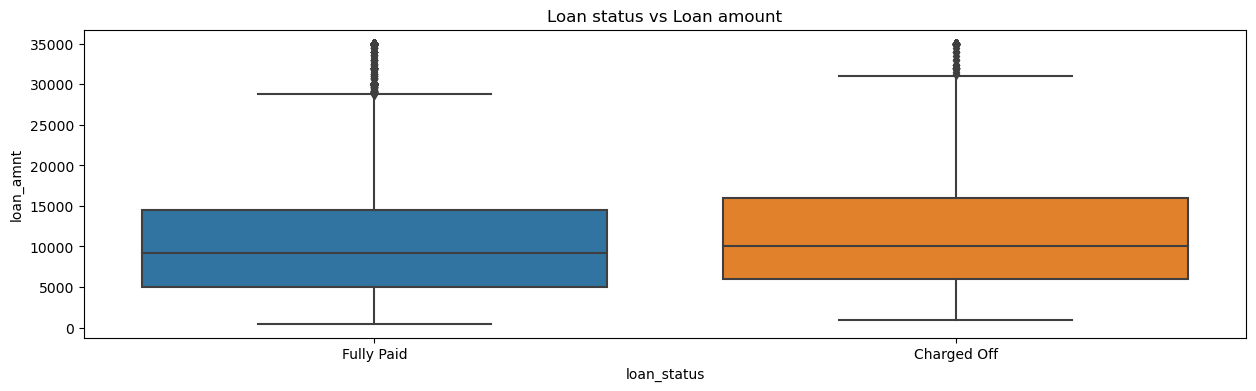

In [41]:
plt.figure(figsize=(15,4))
sns.boxplot(x="loan_status", y="loan_amnt", data=data)
plt.title("Loan status vs Loan amount")
plt.show()

Here we can see that Charged Off has slightly more amount than Fully paid. Therefore the higher the amount the chargeoff risk increases.

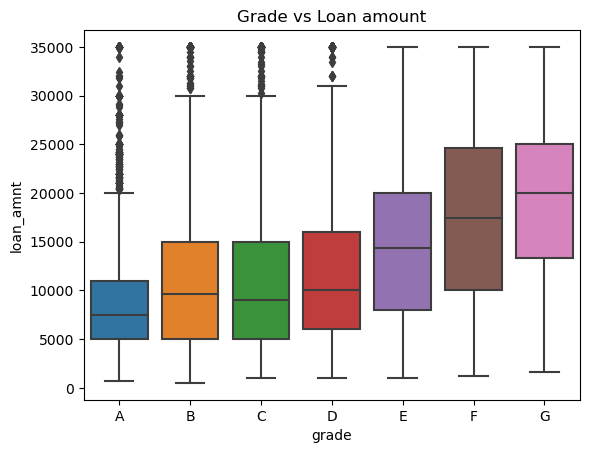

In [42]:
grade_order = data["grade"].unique()
grade_order.sort()
sns.boxplot(x="grade", y="loan_amnt", order= grade_order, data=data)
plt.title("Grade vs Loan amount")
plt.show()

As the grade decreases amount of loan is increasing

Text(0.5, 1.0, 'Home Ownership vs Loan amount')

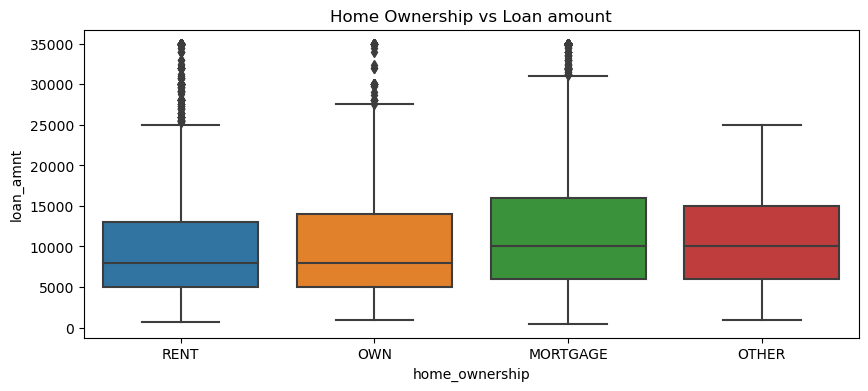

In [43]:
plt.figure(figsize=(10,4))
sns.boxplot(x="home_ownership", y="loan_amnt", data=data)
plt.title("Home Ownership vs Loan amount")

home_ownership does not have that much change but the borrowers who are fom Mortgage are more likely to higher amount than others.

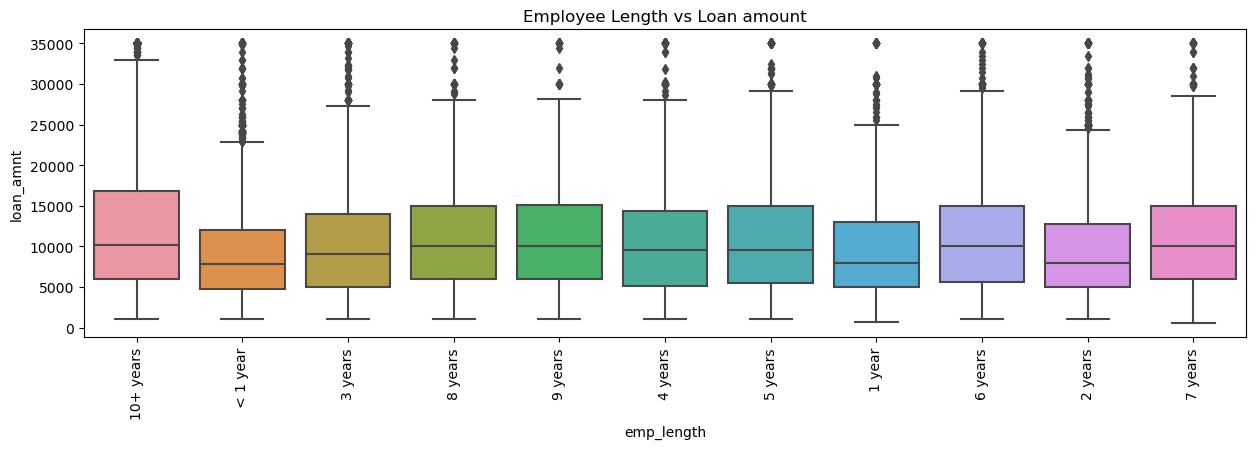

In [44]:
plt.figure(figsize=(15,4))
sns.boxplot(x="emp_length", y="loan_amnt", data=data)
plt.title("Employee Length vs Loan amount")
plt.xticks(rotation=90)
plt.show()

Now lets analyse Annual Income

In loan amount vs employee length variable we can say that, the borrower who has 10+ years of experience are taking high amount of loan than others. less than 1 year experice have taken less amount.

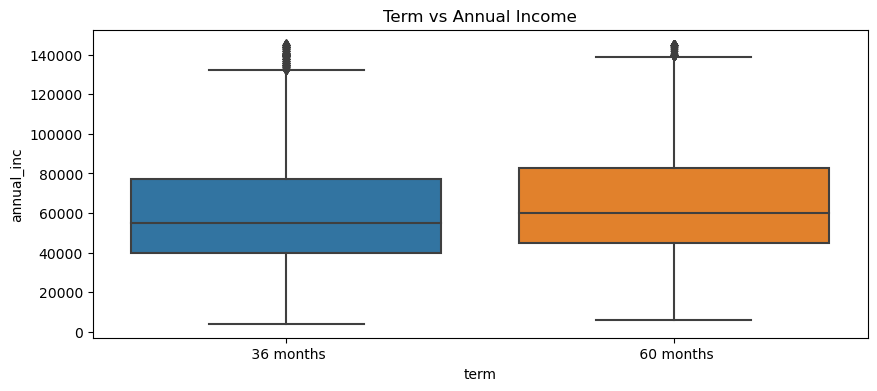

In [45]:
plt.figure(figsize=(10,4))
sns.boxplot(x="term", y="annual_inc", data=data)
plt.title("Term vs Annual Income")
plt.show()

In Term vs Annual Income variable we can say that, the borrowers who have high annual income are taking loans for 60 months tenure as compared to 36 months.

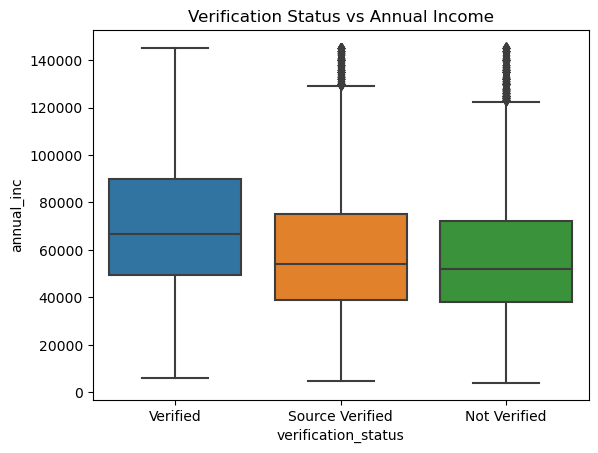

In [46]:
sns.boxplot(x="verification_status", y="annual_inc", data=data)
plt.title("Verification Status vs Annual Income")
plt.show()

In Verification status vs annual income, mostly the verified borrowers are having high annual income than others.

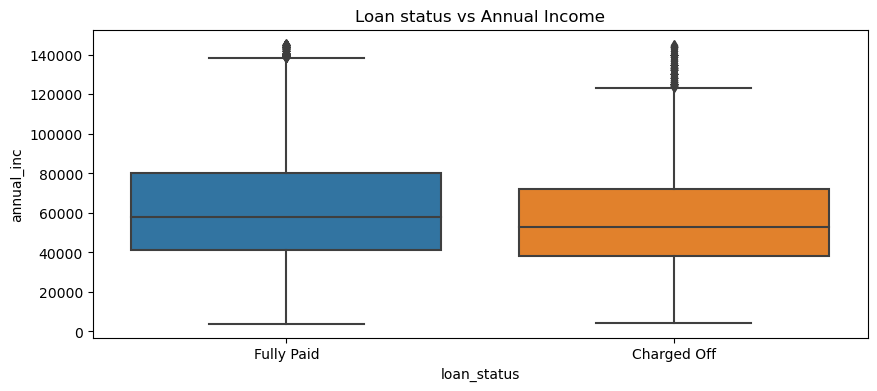

In [47]:
plt.figure(figsize=(10,4))
sns.boxplot(x="loan_status", y="annual_inc", data=data)
plt.title("Loan status vs Annual Income")
plt.show()

In loan status vs annual income, more the annual income the higher the chances to get fully paid.

Now lets analyse Interest rate

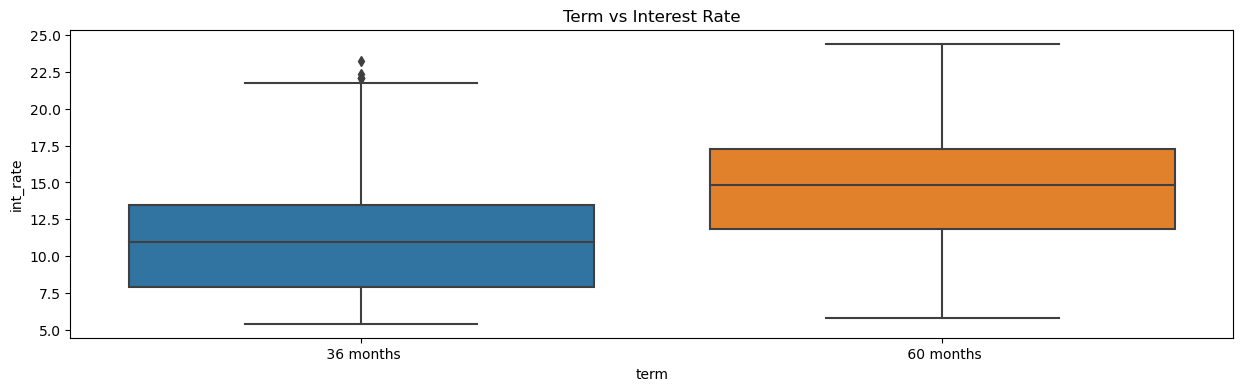

In [48]:
plt.figure(figsize=(15,4))
sns.boxplot(x="term", y="int_rate", data=data)
plt.title("Term vs Interest Rate")
plt.show()

In Term vs Interest more the term period more will be interest.

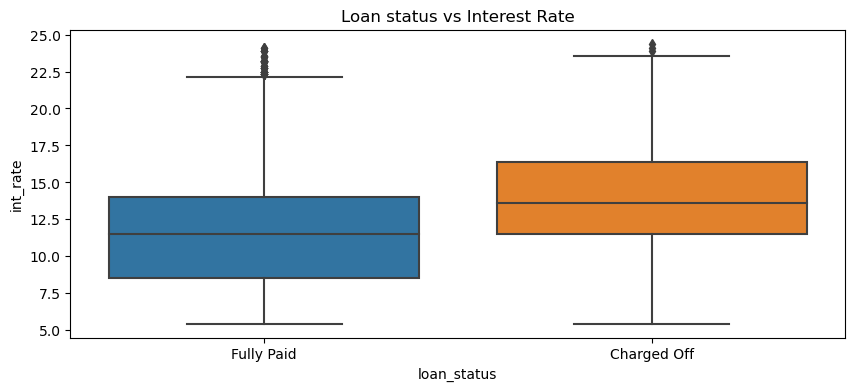

In [49]:
plt.figure(figsize=(10,4))
sns.boxplot(x="loan_status", y="int_rate", data=data)
plt.title("Loan status vs Interest Rate")
plt.show()

In Loan status vs Interest Rate, we can see that the loans with high interested rates are defaulted.

Loan status vs Debt to income ratio



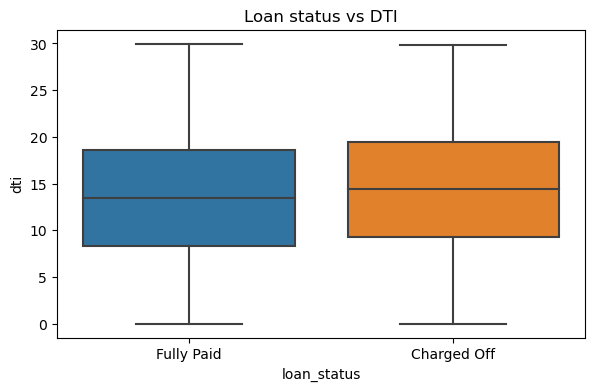

In [51]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="loan_status", y="dti", data=data)
plt.title("Loan status vs DTI")
plt.show()

Borrowers having high Debt to income ratio are more likely to charge off.

Now lets check the correlation between different variables

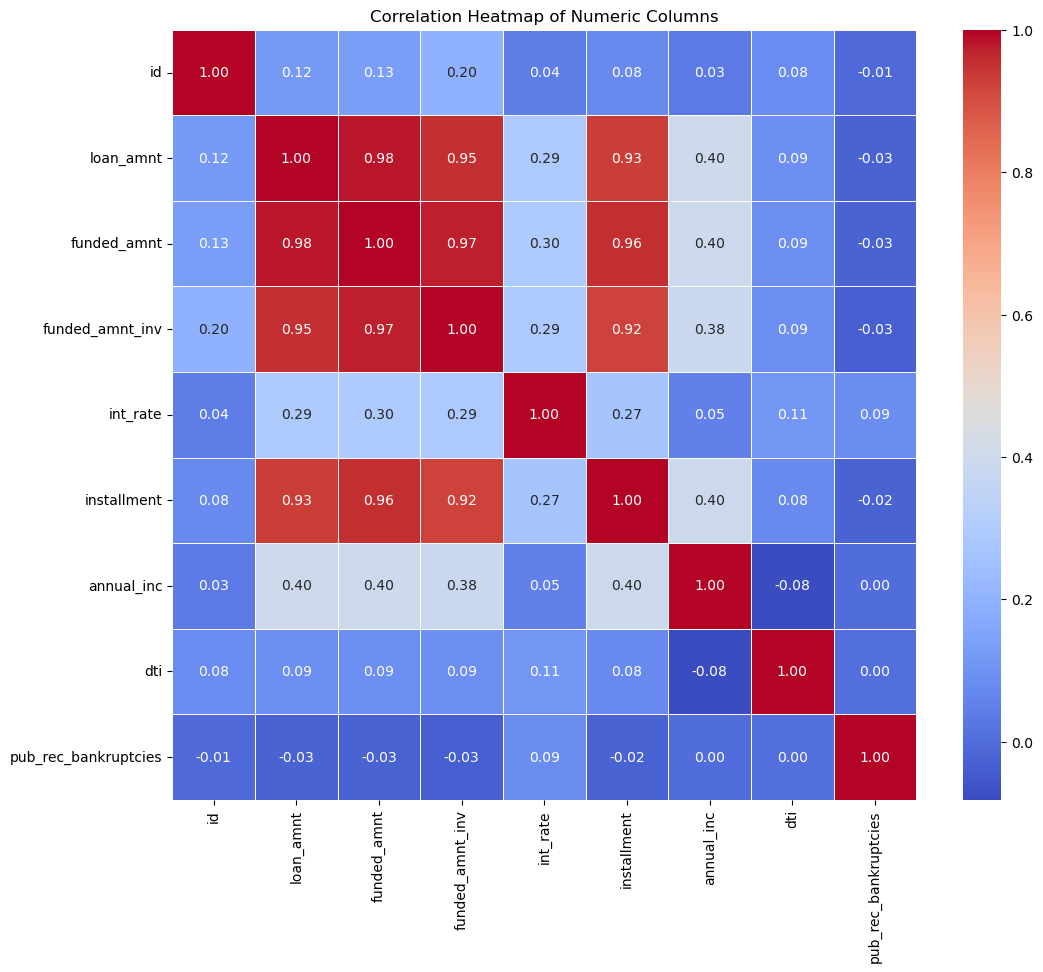

In [52]:
numeric_data = data.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

loan_amnt , funded_amnt , funded_amnt_inv , installment are highly correlated